In [2]:
import matplotlib.pyplot as plt
import numpy as np

# EXPECTED UTILITIES OF RANDOM RESPONSES

## Overview

[This QuantEcon notebook](https://python.quantecon.org/rand_resp.html) describes randomized response surveys in the tradition of Warner [[Warner, 1965](https://python.quantecon.org/zreferences.html#id10)] that are designed  to protect  respondents’ privacy.

Lars Ljungqvist [[Ljungqvist, 1993](https://python.quantecon.org/zreferences.html#id11)]  analyzed how a respondent’s decision about whether to answer truthfully depends on  **expected utility**.

The notebook tells how Ljungqvist  used his  framework to shed light on alternative randomized response survey techniques
proposed, for example, by [[Lanke, 1975](https://python.quantecon.org/zreferences.html#id18)], [[Lanke, 1976](https://python.quantecon.org/zreferences.html#id12)], [[Leysieffer and Warner, 1976](https://python.quantecon.org/zreferences.html#id13)],
[[Anderson, 1976](https://python.quantecon.org/zreferences.html#id14)], [[Fligner *et al.*, 1977](https://python.quantecon.org/zreferences.html#id15)], [[Greenberg *et al.*, 1977](https://python.quantecon.org/zreferences.html#id16)],
[[Greenberg *et al.*, 1969](https://python.quantecon.org/zreferences.html#id17)].

## Privacy Measures

We consider randomized response models with only  two possible answers, “yes” and “no.”

The design determines probabilities

$$
\begin{aligned}
\text{Pr}(\text{yes}|A)&=1-\text{Pr}(\text{no}|A)\\
\text{Pr}(\text{yes}|A^{'})&=1-\text{Pr}(\text{no}|A^{'})
\end{aligned}
$$

These design probabilities in turn can be used to compute the conditional probability of belonging to the sensitive group $ A $ for a given response, say $ r $:


<a id='equation-eq-util-rand-one'></a>
$$
\text{Pr}(A|r)=\frac{\pi_A \text{Pr}(r|A)}{\pi_A \text{Pr}(r|A)+ (1-\pi_A) \text{Pr}(r|A^{'})} \tag{16.1}
$$

## Zoo of Concepts

At this point we describe some concepts proposed by various researchers

### Leysieffer and Warner(1976)

The response $ r $ is regarded as jeopardizing with respect to $ A $ or $ A^{'} $ if


<a id='equation-eq-util-rand-two'></a>
$$
\begin{aligned}
\text{Pr}(A|r)&>\pi_A\\
\text{or}&\\
\text{Pr}(A^{'}|r)&>1-\pi_A
\end{aligned} \tag{16.2}
$$

From Bayes’s rule:


<a id='equation-eq-util-rand-three'></a>
$$
\frac{\text{Pr}(A|r)}{\text{Pr}(A^{'}|r)}\times \frac{(1-\pi_A)}{\pi_A} = \frac{\text{Pr}(r|A)}{\text{Pr}(r|A^{'})} \tag{16.3}
$$

If this expression is greater (less) than unity, it follows that $ r $ is jeopardizing with respect to $ A $($ A^{'} $). Then, the natural measure of jeopardy will be:


<a id='equation-eq-util-rand-four'></a>
$$
\begin{aligned}
g(r|A)&=\frac{\text{Pr}(r|A)}{\text{Pr}(r|A^{'})}\\
&\text{and}\\
g(r|A^{'})&=\frac{\text{Pr}(r|A^{'})}{\text{Pr}(r|A)}
\end{aligned} \tag{16.4}
$$

Suppose, without loss of generality, that $ \text{Pr}(\text{yes}|A)>\text{Pr}(\text{yes}|A^{'}) $, then a yes (no) answer is jeopardizing with respect $ A $($ A^{'} $), that is,

$$
\begin{aligned}
g(\text{yes}|A)&>1\\
\text{and}&\\
g(\text{no}|A^{'})&>1
\end{aligned}
$$

Leysieffer and Warner proved that the variance of the estimate can only be decreased through an increase in one or both of these two measures of jeopardy.

An efficient randomized response model is, therefore, any model that attains the maximum acceptable levels of jeopardy that are consistent with cooperation of the respondents.

As a special example, Leysieffer and Warner considered “a problem in which there is no jeopardy in a no answer”; that is, $ g(\text{no}|A^{'}) $ can be of unlimited magnitude.

Evidently, an  optimal design must have

$$
\text{Pr}(\text{yes}|A)=1
$$

which implies that

$$
\text{Pr}(A|\text{no})=0
$$

### Lanke(1976)

Lanke (1975) [[Lanke, 1975](https://python.quantecon.org/zreferences.html#id18)] argued that “it is membership in Group A that people may want to hide, not membership in the complementary Group A’.”

For that reason, Lanke (1976) [[Lanke, 1976](https://python.quantecon.org/zreferences.html#id12)] argued  that an appropriate measure of protection is to minimize


<a id='equation-eq-util-rand-five-a'></a>
$$
\max \left\{ \text{Pr}(A|\text{yes}) , \text{Pr}(A|\text{no}) \right\} \tag{16.5}
$$

Holding this measure constant, he explained under what conditions the smallest variance of the estimate was achieved with the unrelated question model or Warner’s (1965) original model.

### 2.3 Fligner, Policello, and Singh

Fligner, Policello, and Singh reached similar conclusion as Lanke (1976). [[Fligner *et al.*, 1977](https://python.quantecon.org/zreferences.html#id15)]

They measured “private protection” as


<a id='equation-eq-util-rand-six'></a>
$$
\frac{1-\max \left\{ \text{Pr}(A|\text{yes}) , \text{Pr}(A|\text{no}) \right\}}{1-\pi_A} \tag{16.6}
$$

### 2.4 Greenberg, Kuebler, Abernathy, and Horvitz (1977)

[[Greenberg *et al.*, 1977](https://python.quantecon.org/zreferences.html#id16)]

Greenberg, Kuebler, Abernathy, and Horvitz (1977) stressed the importance of examining the risk to respondents who do not belong to $ A $ as well as the risk to those who do belong to the sensitive group.

They defined the hazard for an individual in $ A $ as the probability that he or she is perceived as belonging to $ A $:


<a id='equation-eq-util-rand-seven-a'></a>
$$
\text{Pr}(\text{yes}|A)\times \text{Pr}(A|\text{yes})+\text{Pr}(\text{no}|A)\times \text{Pr}(A|\text{no}) \tag{16.7}
$$

Similarly, the hazard for an individual who does not belong to $ A $ would be


<a id='equation-eq-util-rand-seven-b'></a>
$$
\text{Pr}(\text{yes}|A^{'})\times \text{Pr}(A|\text{yes})+\text{Pr}(\text{no}|A^{'}) \times \text{Pr}(A|\text{no}) \tag{16.8}
$$

Greenberg et al. (1977) also considered an alternative related measure of hazard that “is likely to be closer to the actual concern felt by a respondent.”

The “limited hazard” for an individual in $ A $ and $ A^{'} $ is


<a id='equation-eq-util-rand-eight-a'></a>
$$
\text{Pr}(\text{yes}|A)\times \text{Pr}(A|\text{yes}) \tag{16.9}
$$

and


<a id='equation-eq-util-rand-eight-b'></a>
$$
\text{Pr}(\text{yes}|A^{'})\times \text{Pr}(A|\text{yes}) \tag{16.10}
$$

This measure is just the first term in [(16.7)](#equation-eq-util-rand-seven-a), i.e., the probability that an individual answers “yes” and is perceived to belong to $ A $.

## Respondent’s Expected Utility

### Truth Border

Key  assumptions  that underlie a randomized response technique for estimating the  fraction of a population that belongs to  $ A $ are:

- **Assumption 1**: Respondents feel discomfort from being thought of as belonging to $ A $.  
- **Assumption 2**: Respondents prefer to answer questions truthfully than to lie, so long as the cost of doing so is not too high. The cost is taken to be the discomfort in 1.  


Let $ r_i $ denote individual $ i $’s response to the randomized question.

$ r_i $ can only take values “yes” or “no”.

For a given  design of a randomized response interview and a given belief about the fraction of  the population
that belongs to $ A $, the respondent’s  answer is associated with a conditional probability $ \text{Pr}(A|r_i) $ that the individual belongs to $ A $.

Given $ r_i $ and complete privacy,  the individual’s utility  is higher if $ r_i $ represents a truthful answer rather than a lie.

In terms of a respondent’s expected utility as a function of $ \text{Pr}(A|r_i) $ and $ r_i $

- The higher is $ \text{Pr}(A|r_i) $, the lower isindividual $ i $’s  expected utility.  
- expected utility is higher if $ r_i $ represents a truthful answer rather than a lie  


Define:

- $ \phi_i \in \left\{\text{truth},\text{lie}\right\} $, a dichotomous variable that indicates whether or not $ r_i $ is a truthful statement.  
- $ U_i\left(\text{Pr}(A|r_i),\phi_i\right) $, a utility function that is differentiable in its first argument, summarizes individual $ i $’s expected utility.  


Then there is an $ r_i $ such that


<a id='equation-eq-util-rand-nine-a'></a>
$$
\frac{\partial U_i\left(\text{Pr}(A|r_i),\phi_i\right) }{\partial \text{Pr}(A|r_i)} <0, \text{ for } \phi_i \in \left\{\text{truth},\text{lie}\right\} \tag{16.11}
$$

and


<a id='equation-eq-util-rand-nine-b'></a>
$$
U_i\left(\text{Pr}(A|r_i),\text{truth}\right)>U_i\left(\text{Pr}(A|r_i),\text{lie}\right)  , \text{ for } \text{Pr}(A|r_i) \in [0,1] \tag{16.12}
$$

Suppose now that  correct answer for individual $ i $ is “yes”.

Individual $ i $ would  choose to answer truthfully if


<a id='equation-eq-util-rand-ten-a'></a>
$$
U_i\left(\text{Pr}(A|\text{yes}),\text{truth}\right)\geq U_i\left(\text{Pr}(A|\text{no}),\text{lie}\right) \tag{16.13}
$$

If the correct  answer is “no”, individual $ i $ would volunteer the correct answer only if


<a id='equation-eq-util-rand-ten-b'></a>
$$
U_i\left(\text{Pr}(A|\text{no}),\text{truth}\right)\geq U_i\left(\text{Pr}(A|\text{yes}),\text{lie}\right) \tag{16.14}
$$

Assume that

$$
\text{Pr}(A|\text{yes})>\pi_A>\text{Pr}(A|\text{no})
$$

so that a “yes” answer increases the odds that an individual belongs to $ A $.

Constraint [(16.14)](#equation-eq-util-rand-ten-b) holds for sure.

Consequently,  constraint [(16.13)](#equation-eq-util-rand-ten-a) becomes the single necessary condition for individual $ i $  always to answer truthfully.

At equality, constraint $ (10.\text{a}) $ determines   conditional probabilities that make the individual indifferent between telling the truth and lying when the correct answer is “yes”:


<a id='equation-eq-util-rand-eleven'></a>
$$
U_i\left(\text{Pr}(A|\text{yes}),\text{truth}\right)= U_i\left(\text{Pr}(A|\text{no}),\text{lie}\right) \tag{16.15}
$$

Equation [(16.15)](#equation-eq-util-rand-eleven) defines a  “truth border”.

Differentiating [(16.15)](#equation-eq-util-rand-eleven) with respect to the conditional probabilities shows that the truth border has a positive slope in the space of conditional probabilities:


<a id='equation-eq-util-rand-twelve'></a>
$$
\frac{\partial \text{Pr}(A|\text{no})}{\partial \text{Pr}(A|\text{yes})}=\frac{\frac{\partial U_i\left(\text{Pr}(A|\text{yes}),\text{truth}\right) }{\partial \text{Pr}(A|\text{yes})}}{\frac{\partial U_i\left(\text{Pr}(A|\text{no}),\text{lie}\right) }{\partial \text{Pr}(A|\text{no})}}>0 \tag{16.16}
$$

The source of the positive relationship is:

- The individual is willing to volunteer a truthful “yes” answer so long as the utility from doing so (i.e., the left side of [(16.15)](#equation-eq-util-rand-eleven)) is at least as high as the utility of lying on the right side of [(16.15)](#equation-eq-util-rand-eleven).  
- Suppose now that $ \text{Pr}(A|\text{yes}) $ increases. That reduces the utility of telling the truth. To preserve indifference between a truthful answer and a lie, $ \text{Pr}(A|\text{no}) $ must increase to reduce the utility of lying.  

### Drawing a  Truth Border

We can deduce two things about the truth border:

- The truth border divides the space of conditional probabilities into two subsets: “truth telling” and “lying”. Thus, sufficient  privacy elicits a truthful answer, whereas insufficient privacy results in a lie. The truth border depends on a respondent’s utility function.  
- Assumptions in [(16.11)](#equation-eq-util-rand-nine-a) and [(16.11)](#equation-eq-util-rand-nine-a) are  sufficient only to guarantee a positive slope of the truth border. The truth border can have either a concave or a convex shape.  


We can draw some truth borders with the following Python code:

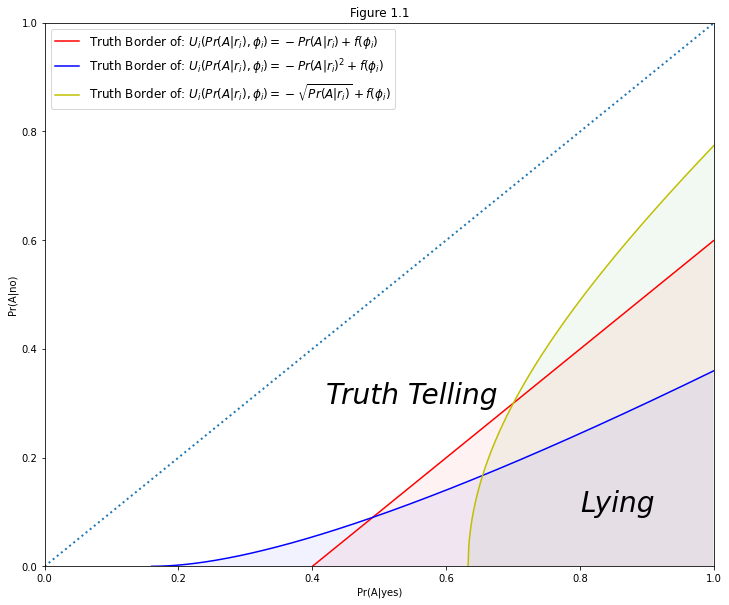

In [3]:
x1 = np.arange(0, 1, 0.001)
y1 = x1 - 0.4
x2 = np.arange(0.4**2, 1, 0.001)
y2 = (pow(x2, 0.5) - 0.4)**2
x3 = np.arange(0.4**0.5, 1, 0.001)
y3 = pow(x3**2 - 0.4, 0.5)
plt.figure(figsize=(12, 10))
plt.plot(x1, y1, 'r-', label='Truth Border of: $U_i(Pr(A|r_i),\phi_i)=-Pr(A|r_i)+f(\phi_i)$')
plt.fill_between(x1, 0, y1, facecolor='red', alpha=0.05)
plt.plot(x2, y2, 'b-', label='Truth Border of: $U_i(Pr(A|r_i),\phi_i)=-Pr(A|r_i)^{2}+f(\phi_i)$')
plt.fill_between(x2, 0, y2, facecolor='blue', alpha=0.05)
plt.plot(x3, y3, 'y-', label='Truth Border of: $U_i(Pr(A|r_i),\phi_i)=-\sqrt{Pr(A|r_i)}+f(\phi_i)$')
plt.fill_between(x3, 0, y3, facecolor='green', alpha=0.05)
plt.plot(x1, x1, ':', linewidth=2)
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('Pr(A|yes)')
plt.ylabel('Pr(A|no)')
plt.text(0.42, 0.3, "Truth Telling", fontdict={'size':28, 'style':'italic'})
plt.text(0.8, 0.1, "Lying", fontdict={'size':28, 'style':'italic'})

plt.legend(loc=0, fontsize='large')
plt.title('Figure 1.1')
plt.show()

Figure 1.1 three types of truth border.

Without loss of generality, we consider the truth border:

$$
U_i(\text{Pr}(A|r_i),\phi_i)=-\text{Pr}(A|r_i)+f(\phi_i)
$$

and plot the “truth telling” and “lying area” of individual $ i $ in Figure 1.2:

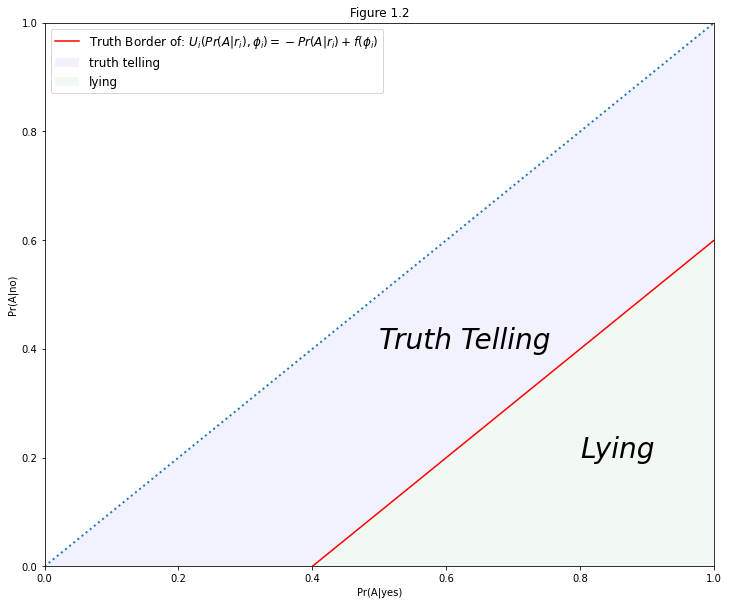

In [4]:
x1 = np.arange(0, 1, 0.001)
y1 = x1 - 0.4
z1 = x1
z2 = 0
plt.figure(figsize=(12, 10))
plt.plot(x1, y1,'r-',label='Truth Border of: $U_i(Pr(A|r_i),\phi_i)=-Pr(A|r_i)+f(\phi_i)$')
plt.plot(x1, x1, ':', linewidth=2)
plt.fill_between(x1, y1, z1, facecolor='blue', alpha=0.05, label='truth telling')
plt.fill_between(x1, z2, y1, facecolor='green', alpha=0.05, label='lying')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('Pr(A|yes)')
plt.ylabel('Pr(A|no)')
plt.text(0.5, 0.4, "Truth Telling", fontdict={'size':28, 'style':'italic'})
plt.text(0.8, 0.2, "Lying", fontdict={'size':28, 'style':'italic'})

plt.legend(loc=0, fontsize='large')
plt.title('Figure 1.2')
plt.show()

## Utilitarian View of Survey Design

### Iso-variance Curves

A statistician’s objective is

- to find a randomized response survey design that minimizes the bias and the variance of the estimator.  


Given a design that ensures truthful answers by all respondents, Anderson(1976, Theorem 1) [[Anderson, 1976](https://python.quantecon.org/zreferences.html#id14)] showed that the minimum variance estimate in the two-response model has variance


<a id='equation-eq-util-rand-thirteen'></a>
$$
\begin{aligned}
V(\text{Pr}(A|\text{yes}) , \text{Pr}(A|\text{no}))
= &\frac{{\pi_A}^2 (1-\pi_A)^2}{n}\times \frac{1}{\text{Pr}(A|\text{yes})-\pi_A}\times \frac{1}{\pi_A-\text{Pr}(A|\text{no})}
\end{aligned} \tag{16.17}
$$

where the random sample with replacement consists of $ n $ individuals.

We can use Expression [(16.17)](#equation-eq-util-rand-thirteen) to draw  iso-variance curves.

The following inequalities restrict the shapes of iso-variance curves:


<a id='equation-eq-util-rand-fourteen-a'></a>
$$
\frac{d \text{ Pr}(A|\text{no})}{d\text{ Pr}(A|\text{yes})}\bigg|_{\text{constant variance}}=\frac{\pi_A-\text{Pr}(A|\text{no})}{\text{Pr}(A|\text{yes})-\pi_A}>0 \tag{16.18}
$$


<a id='equation-eq-util-rand-fourteen-b'></a>
$$
\frac{d^2 \text{ Pr}(A|\text{no})}{d\text{ Pr}(A|\text{yes})^2}\bigg|_{\text{constant variance}}=- \frac{2 \left[\pi_A-\text{Pr}(A|\text{no})\right]}{\left[\text{Pr}(A|\text{yes})-\pi_A \right]^2}<0 \tag{16.19}
$$

From expression [(16.17)](#equation-eq-util-rand-thirteen), [(16.18)](#equation-eq-util-rand-fourteen-a) and [(16.19)](#equation-eq-util-rand-fourteen-b) we can see that:

- Variance can be reduced only by increasing the distance of  $ \text{Pr}(A|\text{yes}) $  and/or  $ \text{Pr}(A|\text{no}) $  from  $ r_A $.  
- Iso-variance curves are always upward-sloping and concave.  

### Drawing  Iso-variance Curves

We use Python code to draw iso-variance curves.

The pairs of conditional probabilities can be attained using Warner’s (1965) model.

Note that:

- Any point on the iso-variance curves can be attained with the unrelated question model as long as the statistician can completely control the model design.  
- Warner’s (1965) original randomized response model is less  flexible than the unrelated question model.  

In [5]:
class Iso_Variance:
    def __init__(self, pi, n):
        self.pi = pi
        self.n = n

    def plotting_iso_variance_curve(self):
        pi = self.pi
        n = self.n

        nv = np.array([0.27, 0.34, 0.49, 0.74, 0.92, 1.1, 1.47, 2.94, 14.7])
        x = np.arange(0, 1, 0.001)
        x0 = np.arange(pi, 1, 0.001)
        x2 = np.arange(0, pi, 0.001)
        y1 = [pi for i in x0]
        y2 = [pi for i in x2]
        y0 = 1 / (1 + (x0 * (1 - pi)**2) / ((1 - x0) * pi**2))

        plt.figure(figsize=(12, 10))
        plt.plot(x0, y0, 'm-', label='Warner')
        plt.plot(x, x, 'c:', linewidth=2)
        plt.plot(x0, y1,'c:', linewidth=2)
        plt.plot(y2, x2, 'c:', linewidth=2)
        for i in range(len(nv)):
            y = pi - (pi**2 * (1 - pi)**2) / (n * (nv[i] / n) * (x0 - pi + 1e-8))
            plt.plot(x0, y, 'k--', alpha=1 - 0.07 * i, label=f'V{i+1}')
        plt.xlim([0, 1])
        plt.ylim([0, 0.5])
        plt.xlabel('Pr(A|yes)')
        plt.ylabel('Pr(A|no)')
        plt.legend(loc=0, fontsize='large')
        plt.text(0.32, 0.28, "High Var", fontdict={'size':15, 'style':'italic'})
        plt.text(0.91, 0.01, "Low Var", fontdict={'size':15, 'style':'italic'})
        plt.title('Figure 2')
        plt.show()

Properties of  iso-variance curves  are:

- All points on one iso-variance curve share the same variance  
- From $ V_1 $ to $ V_9 $, the variance of the iso-variance curve increase monotonically, as colors  brighten monotonically  


Suppose the parameters of the iso-variance model follow those in Ljungqvist [[Ljungqvist, 1993](https://python.quantecon.org/zreferences.html#id11)], which are:

- $ \pi=0.3 $  
- $ n=100 $  


Then we can plot the iso-variance curve in Figure 2:

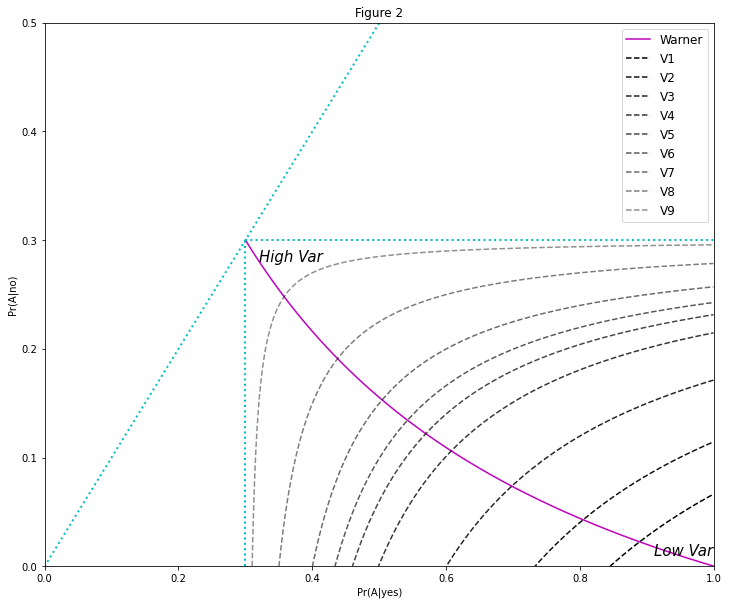

In [6]:
var = Iso_Variance(pi=0.3, n=100)
var.plotting_iso_variance_curve()

### Optimal Survey

A point on an iso-variance curves can be attained with the unrelated question design.

We now focus on finding an “optimal survey design” that

- Minimizes the variance of the estimator subject to privacy restrictions.  


To obtain an optimal  design, we first superimpose all individuals’ truth borders  on the iso-variance mapping.

To construct an optimal  design

- The statistician should  find the intersection of  areas above all truth borders; that is, the set of conditional probabilities ensuring truthful answers from all respondents.  
- The point where this set touches the lowest possible iso-variance curve determines an optimal survey design.  


Consquently, a minimum variance unbiased estimator  is pinned down by an individual who is the least willing to volunteer a truthful answer.

Here are some comments about the model design:

- An individual’s decision of whether or not to answer truthfully depends on his or her belief about other respondents’ behavior, because this determines the individual’s calculation of $ \text{ Pr}(A|\text{yes}) $ and $ \text{ Pr}(A|\text{no}) $.  
- An  equilibrium of the optimal design model is a Nash equilibrium of a noncooperative game.  
- Assumption [(16.12)](#equation-eq-util-rand-nine-b) is sufficient to guarantee  existence of an optimal model design. By choosing $ \text{ Pr}(A|\text{yes}) $ and $ \text{ Pr}(A|\text{no}) $ sufficiently close to each other, all respondents will find it optimal to answer truthfully. The closer are these probabilities, the higher the variance of the estimator becomes.  
- If  respondents experience a large enough increase in expected utility from telling the truth, then there is no need to use a randomized response model. The smallest possible variance of the estimate is then obtained at $ \text{ Pr}(A|\text{yes})=1 $ and $ \text{ Pr}(A|\text{no})=0 $ ; that is, when respondents answer truthfully to direct questioning.  
- A more general design problem would be to minimize some weighted sum of the estimator’s variance and bias. It would be optimal to accept some lies from the most “reluctant” respondents.  

## Criticisms of Proposed Privacy Measures

We can use a utilitarian approach to analyze some  privacy measures.

We’ll enlist Python Code to help us.

### Analysis of Method of Lanke’s (1976)

Lanke (1976) recommends a privacy  protection criterion that minimizes:


<a id='equation-eq-util-rand-five-b'></a>
$$
\max \left\{ \text{Pr}(A|\text{yes}) , \text{Pr}(A|\text{no}) \right\} \tag{16.20}
$$

Following Lanke’s suggestion, the statistician should find the highest possible $ \text{ Pr}(A|\text{yes}) $ consistent with truth telling while $ \text{ Pr}(A|\text{no}) $ is fixed at 0. The variance is then minimized at point $ X $ in Figure 3.

However, we can see that in Figure 3, point $ Z $ offers a smaller variance that still allows cooperation of the respondents, and it is achievable following our discussion of the truth border in Part III:

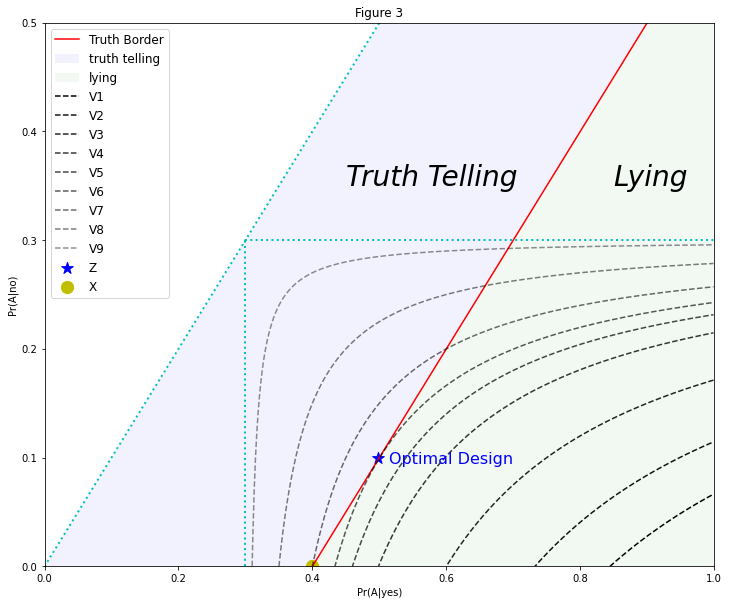

In [7]:
pi = 0.3
n = 100
nv = [0.27, 0.34, 0.49, 0.74, 0.92, 1.1, 1.47, 2.94, 14.7]
x = np.arange(0, 1, 0.001)
y = x - 0.4
z = x
x0 = np.arange(pi, 1, 0.001)
x2 = np.arange(0, pi, 0.001)
y1 = [pi for i in x0]
y2 = [pi for i in x2]

plt.figure(figsize=(12, 10))
plt.plot(x, x, 'c:', linewidth=2)
plt.plot(x0, y1, 'c:', linewidth=2)
plt.plot(y2, x2, 'c:', linewidth=2)
plt.plot(x, y, 'r-', label='Truth Border')
plt.fill_between(x, y, z, facecolor='blue', alpha=0.05, label='truth telling')
plt.fill_between(x, 0, y, facecolor='green', alpha=0.05, label='lying')
for i in range(len(nv)):
    y = pi - (pi**2 * (1 - pi)**2) / (n * (nv[i] / n) * (x0 - pi + 1e-8))
    plt.plot(x0, y, 'k--', alpha=1 - 0.07 * i, label=f'V{i+1}')


plt.scatter(0.498, 0.1, c='b', marker='*', label='Z', s=150)
plt.scatter(0.4, 0, c='y', label='X', s=150)
plt.xlim([0, 1])
plt.ylim([0, 0.5])
plt.xlabel('Pr(A|yes)')
plt.ylabel('Pr(A|no)')
plt.text(0.45, 0.35, "Truth Telling", fontdict={'size':28, 'style':'italic'})
plt.text(0.85, 0.35, "Lying",fontdict = {'size':28, 'style':'italic'})
plt.text(0.515, 0.095, "Optimal Design", fontdict={'size':16,'color':'b'})
plt.legend(loc=0, fontsize='large')
plt.title('Figure 3')
plt.show()

### Method of Leysieffer and Warner (1976)

Leysieffer and Warner (1976) recommend a  two-dimensional measure of jeopardy that reduces to a single dimension when there is no jeopardy in a ‘no’ answer”, which means that

$$
\text{Pr}(\text{yes}|A)=1
$$

and

$$
\text{Pr}(A|\text{no})=0
$$

This is  not an optimal  choice under a utilitarian approach.

### Analysis on the Method of Chaudhuri and Mukerjee’s (1988)

[[Chadhuri and Mukerjee, 1988](https://python.quantecon.org/zreferences.html#id9)]

Chaudhuri and Mukerjee (1988) argued that the individual may find that since “yes” may sometimes relate to the sensitive group A, a clever respondent may falsely but safely always be inclined to respond “no”. In this situation, the truth border is such that individuals choose to lie whenever the truthful answer is “yes” and

$$
\text{Pr}(A|\text{no})=0
$$

Here the gain from lying is too high for someone to volunteer a “yes” answer.

This  means that

$$
U_i\left(\text{Pr}(A|\text{yes}),\text{truth}\right)< U_i\left(\text{Pr}(A|\text{no}),\text{lie}\right)
$$

in any situation always.

As a result, there is no attainable model design.

However, under a utilitarian approach there should exist other survey designs that are consistent with truthful answers.

In particular, respondents will choose to answer truthfully if the relative advantage from lying is eliminated.

We can use Python to show that the optimal model design corresponds to point Q in Figure 4:

In [8]:
def f(x):
    if x < 0.16:
        return 0
    else:
        return (pow(x, 0.5) - 0.4)**2

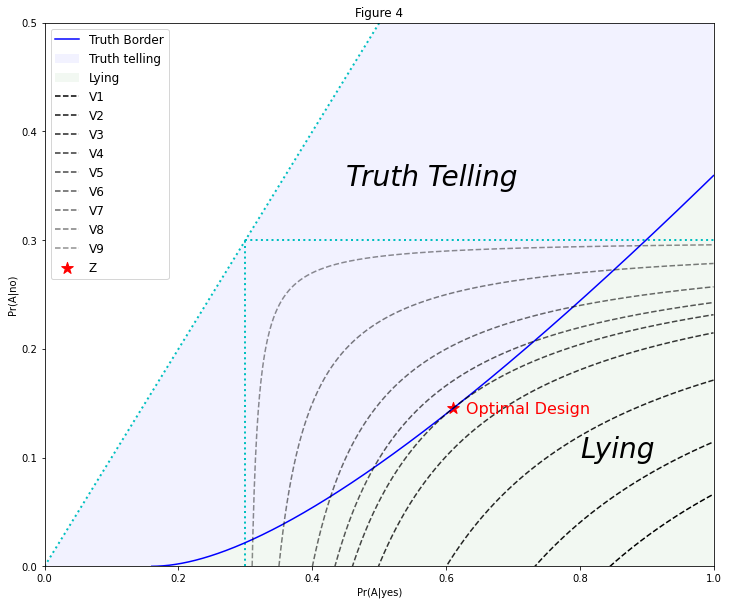

In [9]:
pi = 0.3
n = 100
nv = [0.27, 0.34, 0.49, 0.74, 0.92, 1.1, 1.47, 2.94, 14.7]
x = np.arange(0, 1, 0.001)
y = [f(i) for i in x]
z = x
x0 = np.arange(pi, 1, 0.001)
x2 = np.arange(0, pi, 0.001)
y1 = [pi for i in x0]
y2 = [pi for i in x2]
x3 = np.arange(0.16, 1, 0.001)
y3 = (pow(x3, 0.5) - 0.4)**2

plt.figure(figsize=(12, 10))
plt.plot(x, x, 'c:', linewidth=2)
plt.plot(x0, y1,'c:', linewidth=2)
plt.plot(y2, x2,'c:', linewidth=2)
plt.plot(x3, y3,'b-', label='Truth Border')
plt.fill_between(x, y, z, facecolor='blue', alpha=0.05, label='Truth telling')
plt.fill_between(x3, 0, y3,facecolor='green', alpha=0.05, label='Lying')
for i in range(len(nv)):
    y = pi - (pi**2 * (1 - pi)**2) / (n * (nv[i] / n) * (x0 - pi + 1e-8))
    plt.plot(x0, y, 'k--', alpha=1 - 0.07 * i, label=f'V{i+1}')
plt.scatter(0.61, 0.146, c='r', marker='*', label='Z', s=150)
plt.xlim([0, 1])
plt.ylim([0, 0.5])
plt.xlabel('Pr(A|yes)')
plt.ylabel('Pr(A|no)')
plt.text(0.45, 0.35, "Truth Telling", fontdict={'size':28, 'style':'italic'})
plt.text(0.8, 0.1, "Lying", fontdict={'size':28, 'style':'italic'})
plt.text(0.63, 0.141, "Optimal Design", fontdict={'size':16,'color':'r'})
plt.legend(loc=0, fontsize='large')
plt.title('Figure 4')
plt.show()

### Method of Greenberg et al. (1977)

[[Greenberg *et al.*, 1977](https://python.quantecon.org/zreferences.html#id16)]

Greenberg et al. (1977) defined the hazard for an individual in $ A $ as the probability that he or she is perceived as belonging to $ A $:


<a id='equation-eq-util-rand-seven-aa'></a>
$$
\text{Pr}(\text{yes}|A)\times \text{Pr}(A|\text{yes})+\text{Pr}(\text{no}|A)\times \text{Pr}(A|\text{no}) \tag{16.21}
$$

The hazard for an individual who does not belong to $ A $ is


<a id='equation-eq-util-rand-seven-bb'></a>
$$
\text{Pr}(\text{yes}|A^{'})\times \text{Pr}(A|\text{yes})+\text{Pr}(\text{no}|A^{'}) \times \text{Pr}(A|\text{no}) \tag{16.22}
$$

They also considered an alternative related measure of hazard that they said  “is likely to be closer to the actual concern felt by a respondent.”

Their “limited hazard” for an individual in $ A $ and $ A^{'} $ is


<a id='equation-eq-util-rand-eight-aa'></a>
$$
\text{Pr}(\text{yes}|A)\times \text{Pr}(A|\text{yes}) \tag{16.23}
$$

and


<a id='equation-eq-util-rand-eight-bb'></a>
$$
\text{Pr}(\text{yes}|A^{'})\times \text{Pr}(A|\text{yes}) \tag{16.24}
$$

According to Greenberg et al. (1977), a respondent commits himself or herself to answer truthfully on the basis of a probability in [(16.21)](#equation-eq-util-rand-seven-aa) or [(16.23)](#equation-eq-util-rand-eight-aa) **before** randomly selecting the question to be answered.

Suppose that the appropriate privacy measure is captured by the notion of “limited hazard” in [(16.23)](#equation-eq-util-rand-eight-aa) and [(16.24)](#equation-eq-util-rand-eight-bb).

Consider an unrelated question model where the unrelated question is replaced by the instruction “Say the word ‘no’”, which implies that

$$
\text{Pr}(A|\text{yes})=1
$$

and it follows that:

- Hazard for an individual in $ A^{'} $ is 0.  
- Hazard for an individual in $ A $ can also be made arbitrarily small by choosing a sufficiently small $ \text{Pr}(\text{yes}|A) $.  


Even though this hazard can be set arbitrarily close to 0, an individual in $ A $ will completely reveal his or her identity whenever truthfully answering the sensitive question.

However, under utilitarian framework, it is obviously contradictory.

If the individuals are willing to volunteer this information, it seems that the randomized response design was not necessary in the first place.

It ignores the fact that respondents retain the option of lying until they have seen the question to be answered.

## Concluding Remarks

The justifications for a randomized response procedure are that

- Respondents are thought to feel discomfort from being perceived as belonging to the sensitive group.  
- Respondents prefer to answer questions truthfully than to lie, unless it is too revealing.  


If a privacy measure is not completely consistent with the rational behavior of the respondents, all efforts to derive an optimal model design are futile.

A utilitarian approach provides a systematic way to model respondents’ behavior under the assumption that they maximize their expected utilities.

In  a utilitarian analysis:

- A truth border divides the space of conditional probabilities of being perceived as belonging to the sensitive group, $ \text{Pr}(A|\text{yes}) $ and $ \text{Pr}(A|\text{no}) $, into the truth-telling region and the lying region.  
- The optimal model design is obtained at the point where the truth border touches the lowest possible iso-variance curve.  


A practical implication of the  analysis of [[Ljungqvist, 1993](https://python.quantecon.org/zreferences.html#id11)] is that uncertainty about respondents’ demands for privacy can be acknowledged by **choosing $ \text{Pr}(A|\text{yes}) $ and $ \text{Pr}(A|\text{no}) $ sufficiently close to each other**.